# Heart Attack Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

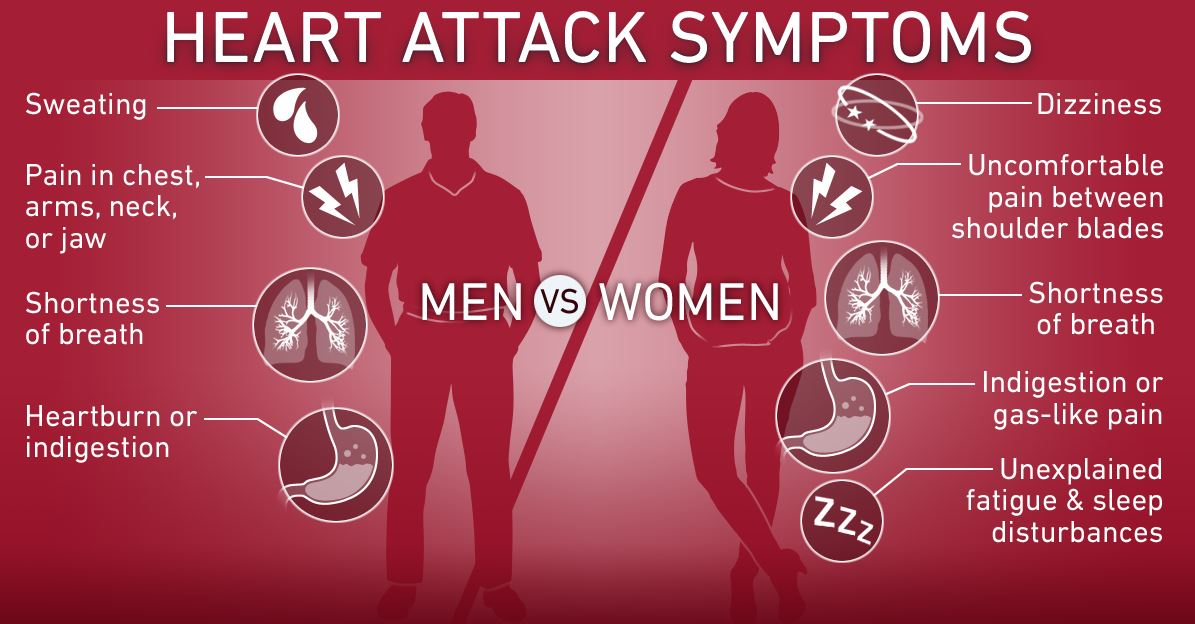

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [16]:
# read data 
df = pd.read_csv("8_3_RegularizationDurumCalismasi_dataset.csv")

In [17]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis

In [20]:
# missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis

In [21]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis

In [22]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

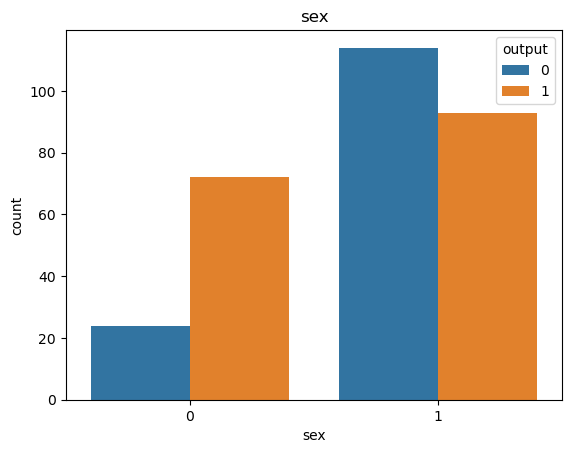

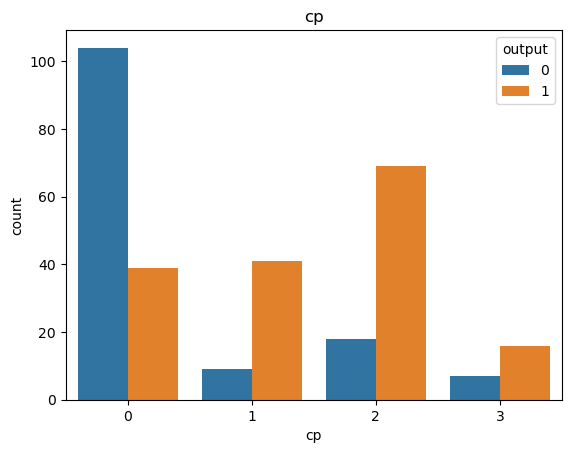

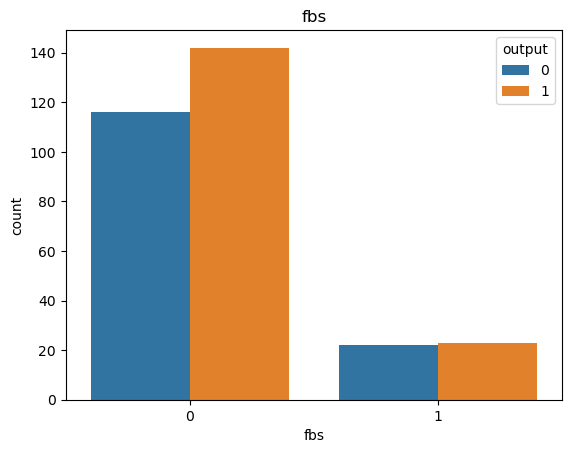

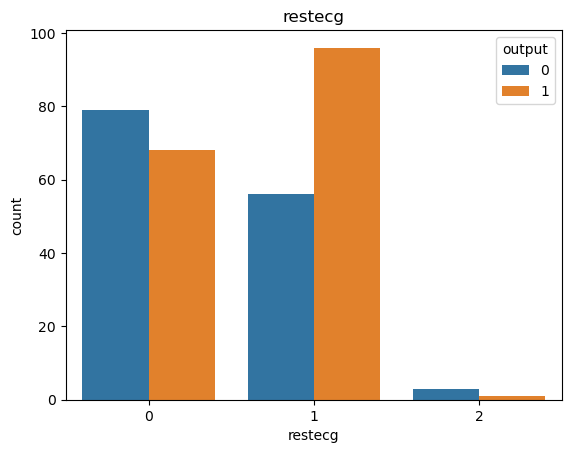

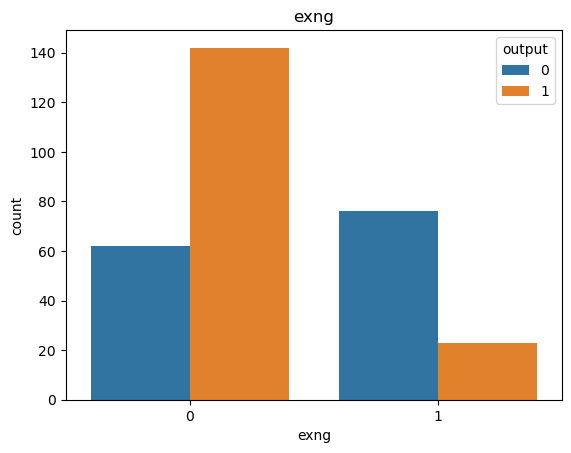

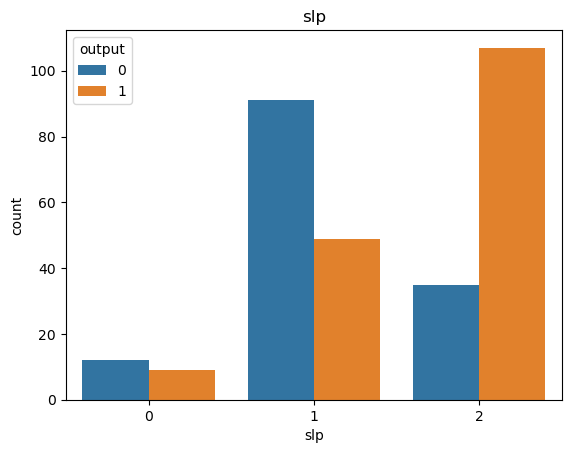

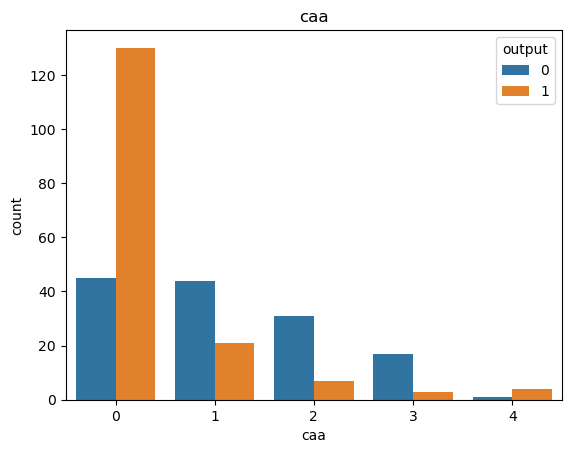

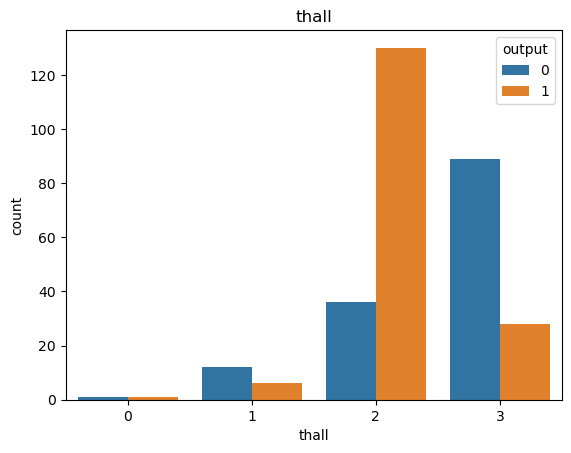

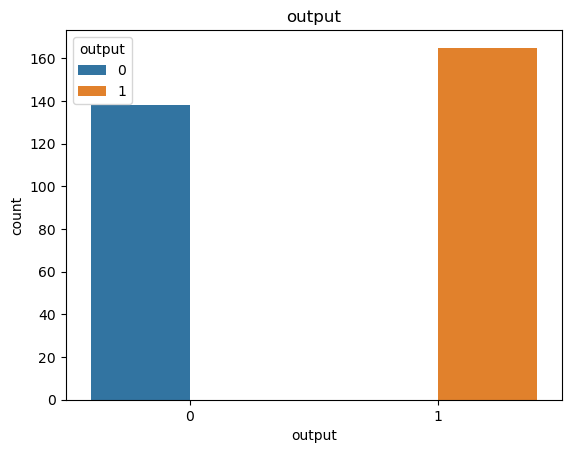

In [23]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [24]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

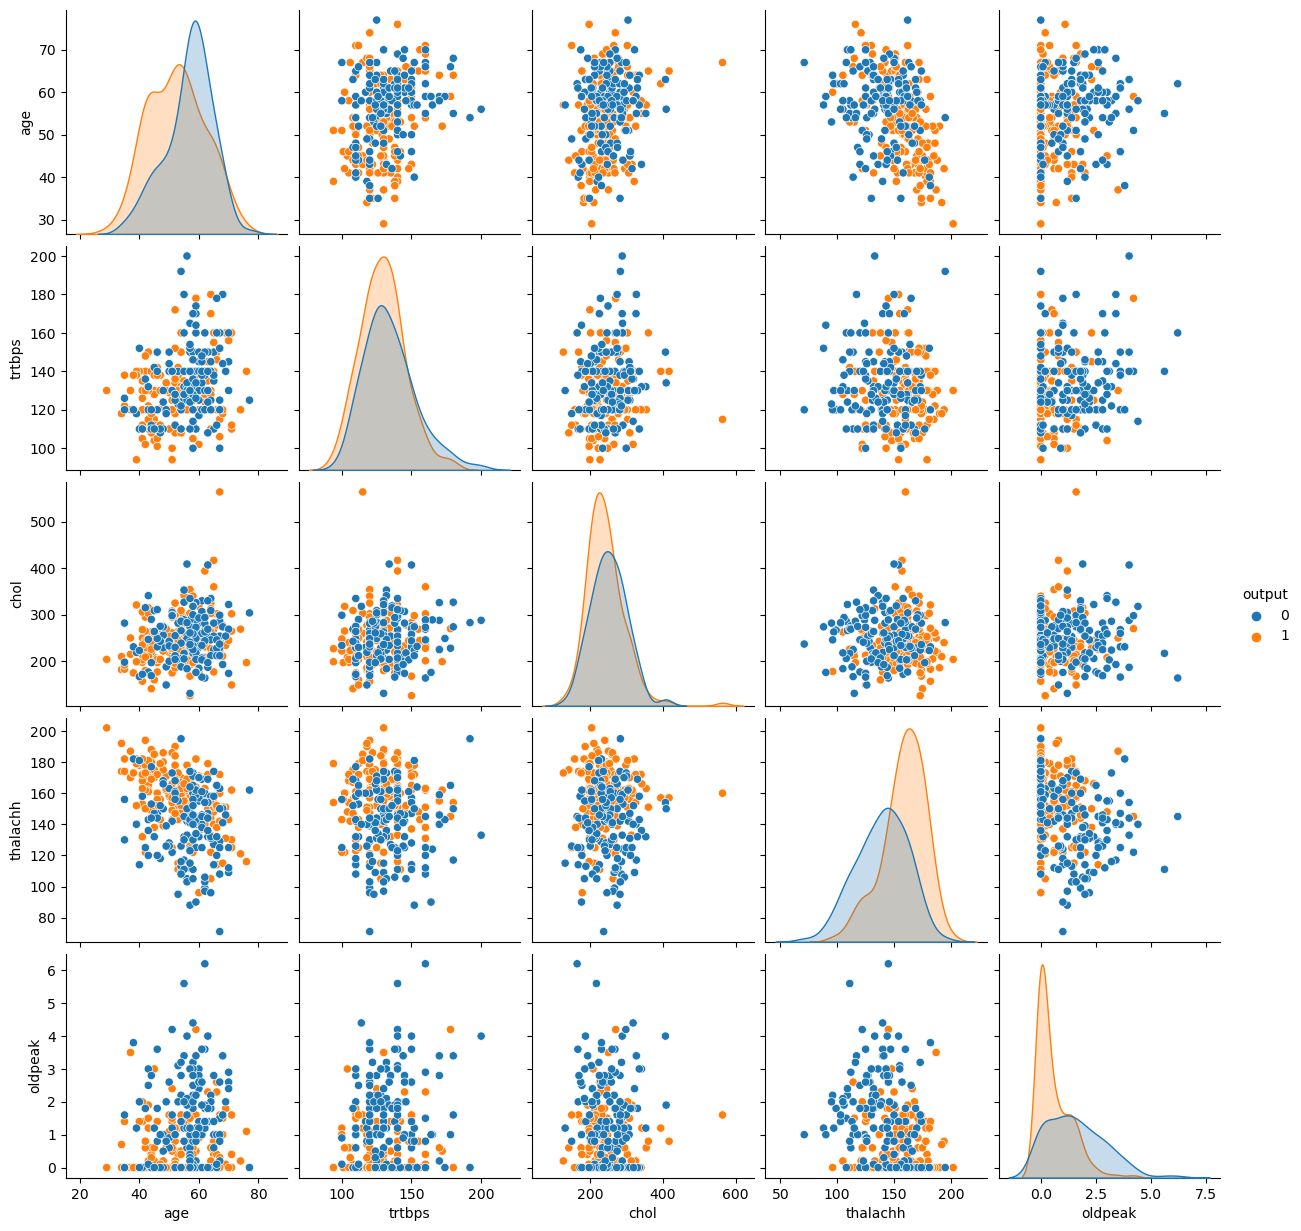

In [25]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

<a id="8"></a>
## Standardization

In [26]:
scaler = StandardScaler()
scaler

StandardScaler()

In [27]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [28]:
scaled_array 

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [29]:
# pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [30]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [31]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [32]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


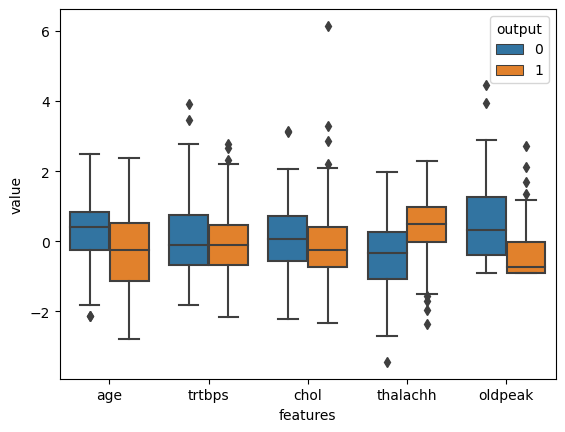

In [33]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

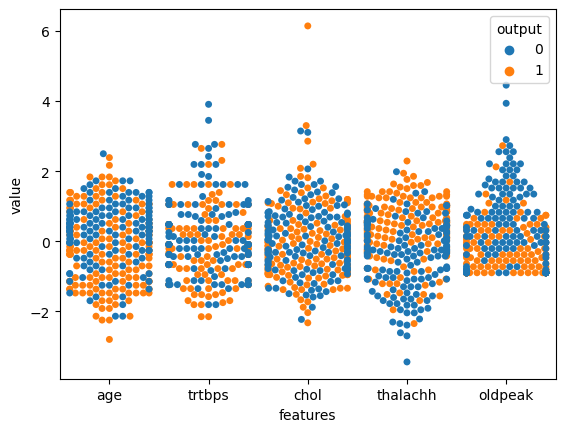

In [34]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

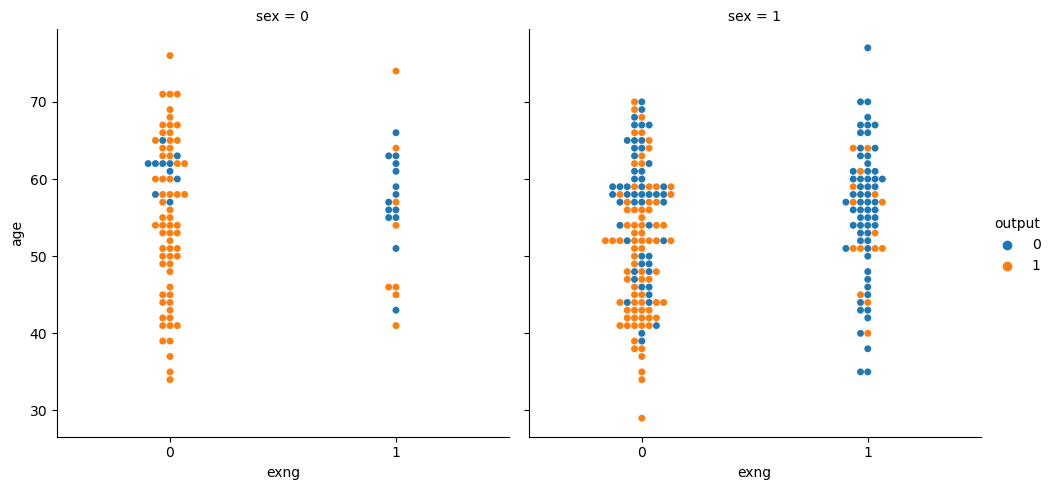

In [35]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

<a id="12"></a>
## Correlation Analysis

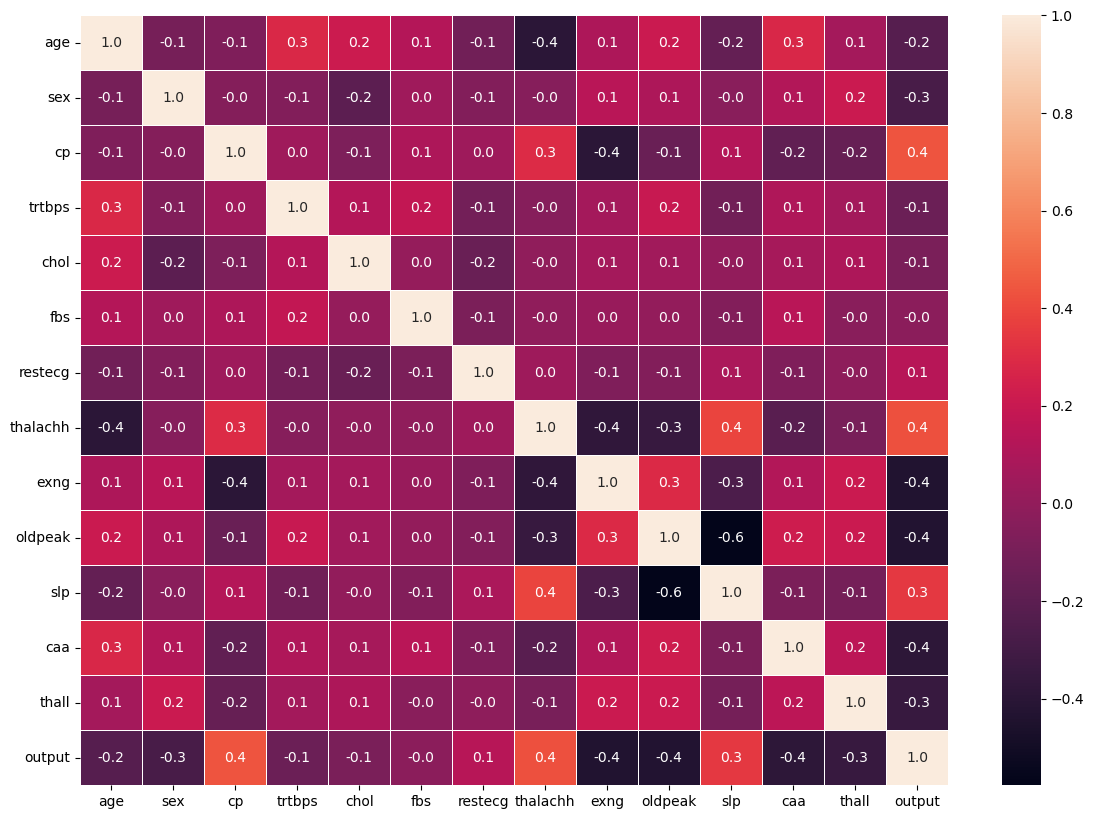

In [36]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.
* 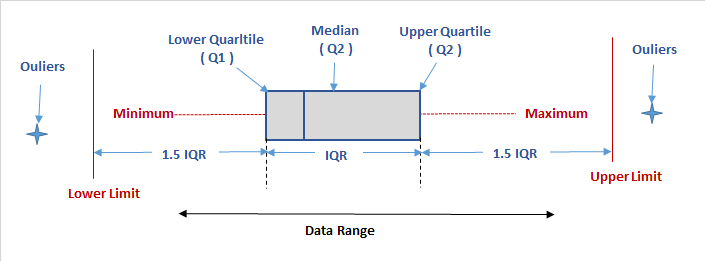

In [37]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [38]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (298, 14)


<a id="14"></a>
## Modelling

In [40]:
df1 = df.copy()

### Encoding Categorical Columns
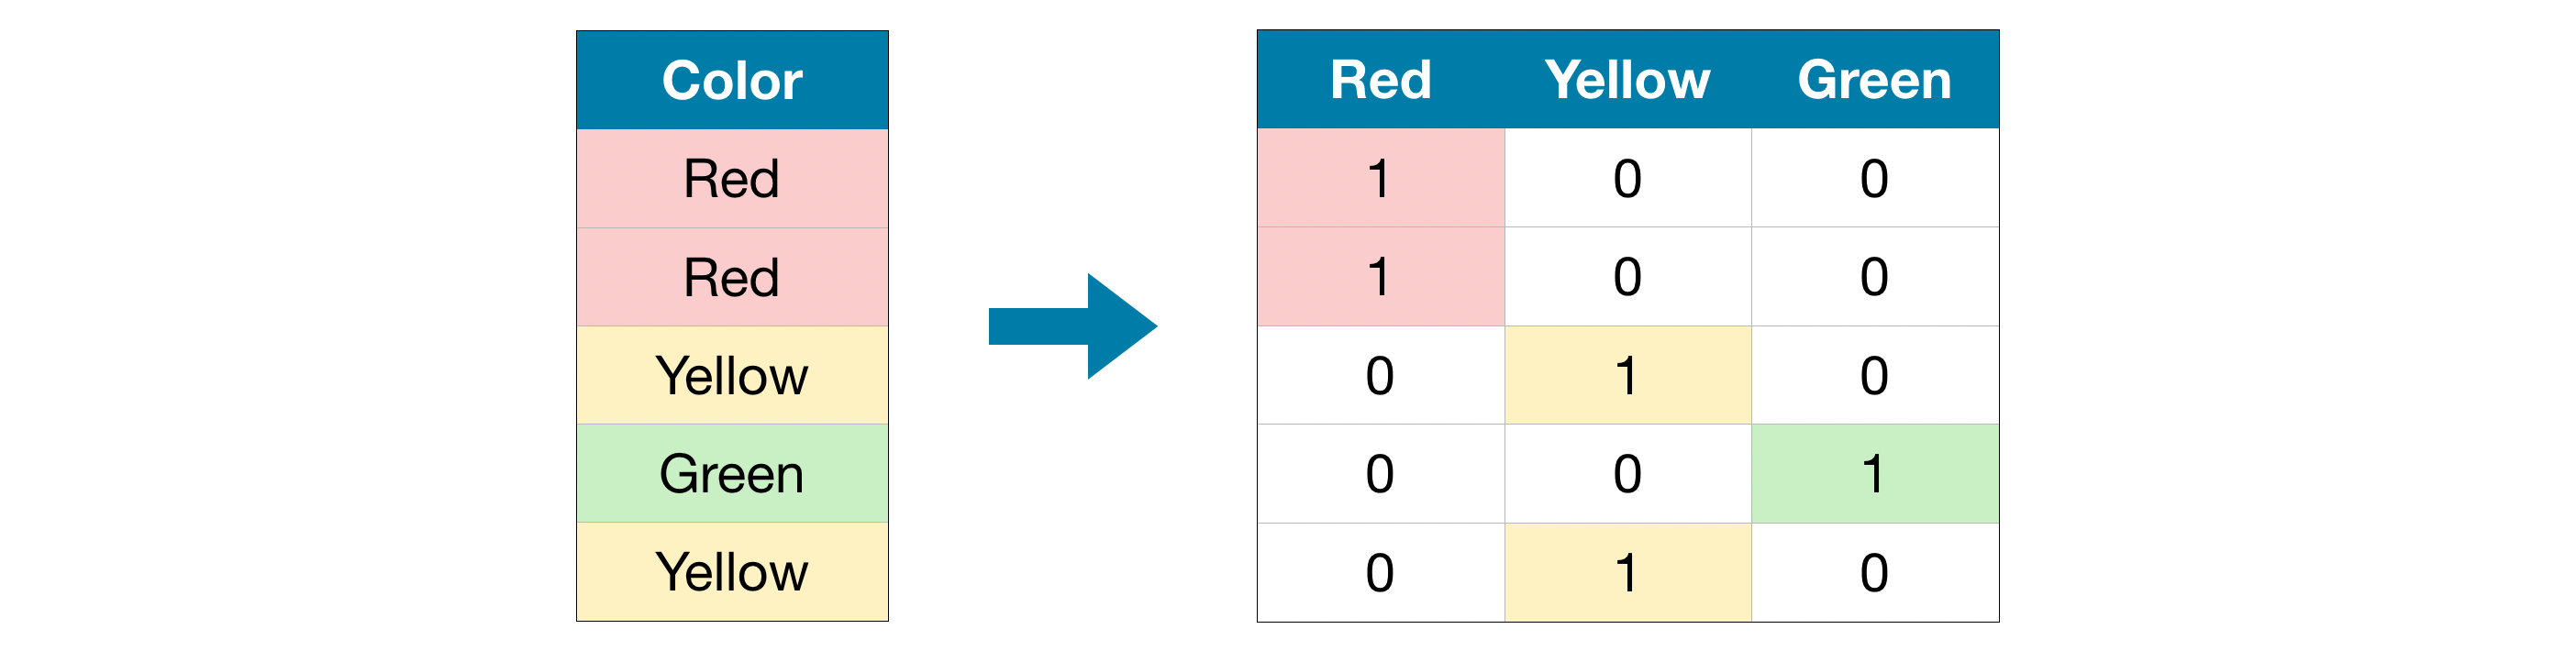

In [41]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [42]:
# 
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

### Scaling

In [43]:
scaler = StandardScaler()
scaler

StandardScaler()

In [44]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.303950,-0.666538,2.297269,0.590082,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### Train/Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


### Logistic Regression 

In [46]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [47]:
# fitting = training
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.94252608, 0.05747392],
       [0.06987766, 0.93012234],
       [0.11254982, 0.88745018],
       [0.47977949, 0.52022051],
       [0.08754891, 0.91245109],
       [0.01966602, 0.98033398],
       [0.01313076, 0.98686924],
       [0.25608762, 0.74391238],
       [0.93025651, 0.06974349],
       [0.04680322, 0.95319678],
       [0.95711862, 0.04288138],
       [0.01124265, 0.98875735],
       [0.41858447, 0.58141553],
       [0.6057325 , 0.3942675 ],
       [0.02733085, 0.97266915],
       [0.0261538 , 0.9738462 ],
       [0.84053044, 0.15946956],
       [0.03593571, 0.96406429],
       [0.86161159, 0.13838841],
       [0.97599523, 0.02400477],
       [0.6204125 , 0.3795875 ],
       [0.31203666, 0.68796334],
       [0.93491854, 0.06508146],
       [0.00474821, 0.99525179],
       [0.44481395, 0.55518605],
       [0.33837871, 0.66162129],
       [0.03945105, 0.96054895],
       [0.99154232, 0.00845768],
       [0.46749931, 0.53250069],
       [0.69698284, 0.30301716]])

In [49]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [50]:
#dummy_ = pd.DataFrame(y_pred_prob)
#dummy_["y_pred"] = y_pred
#dummy_.head()

In [51]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


##### ROC Curve 
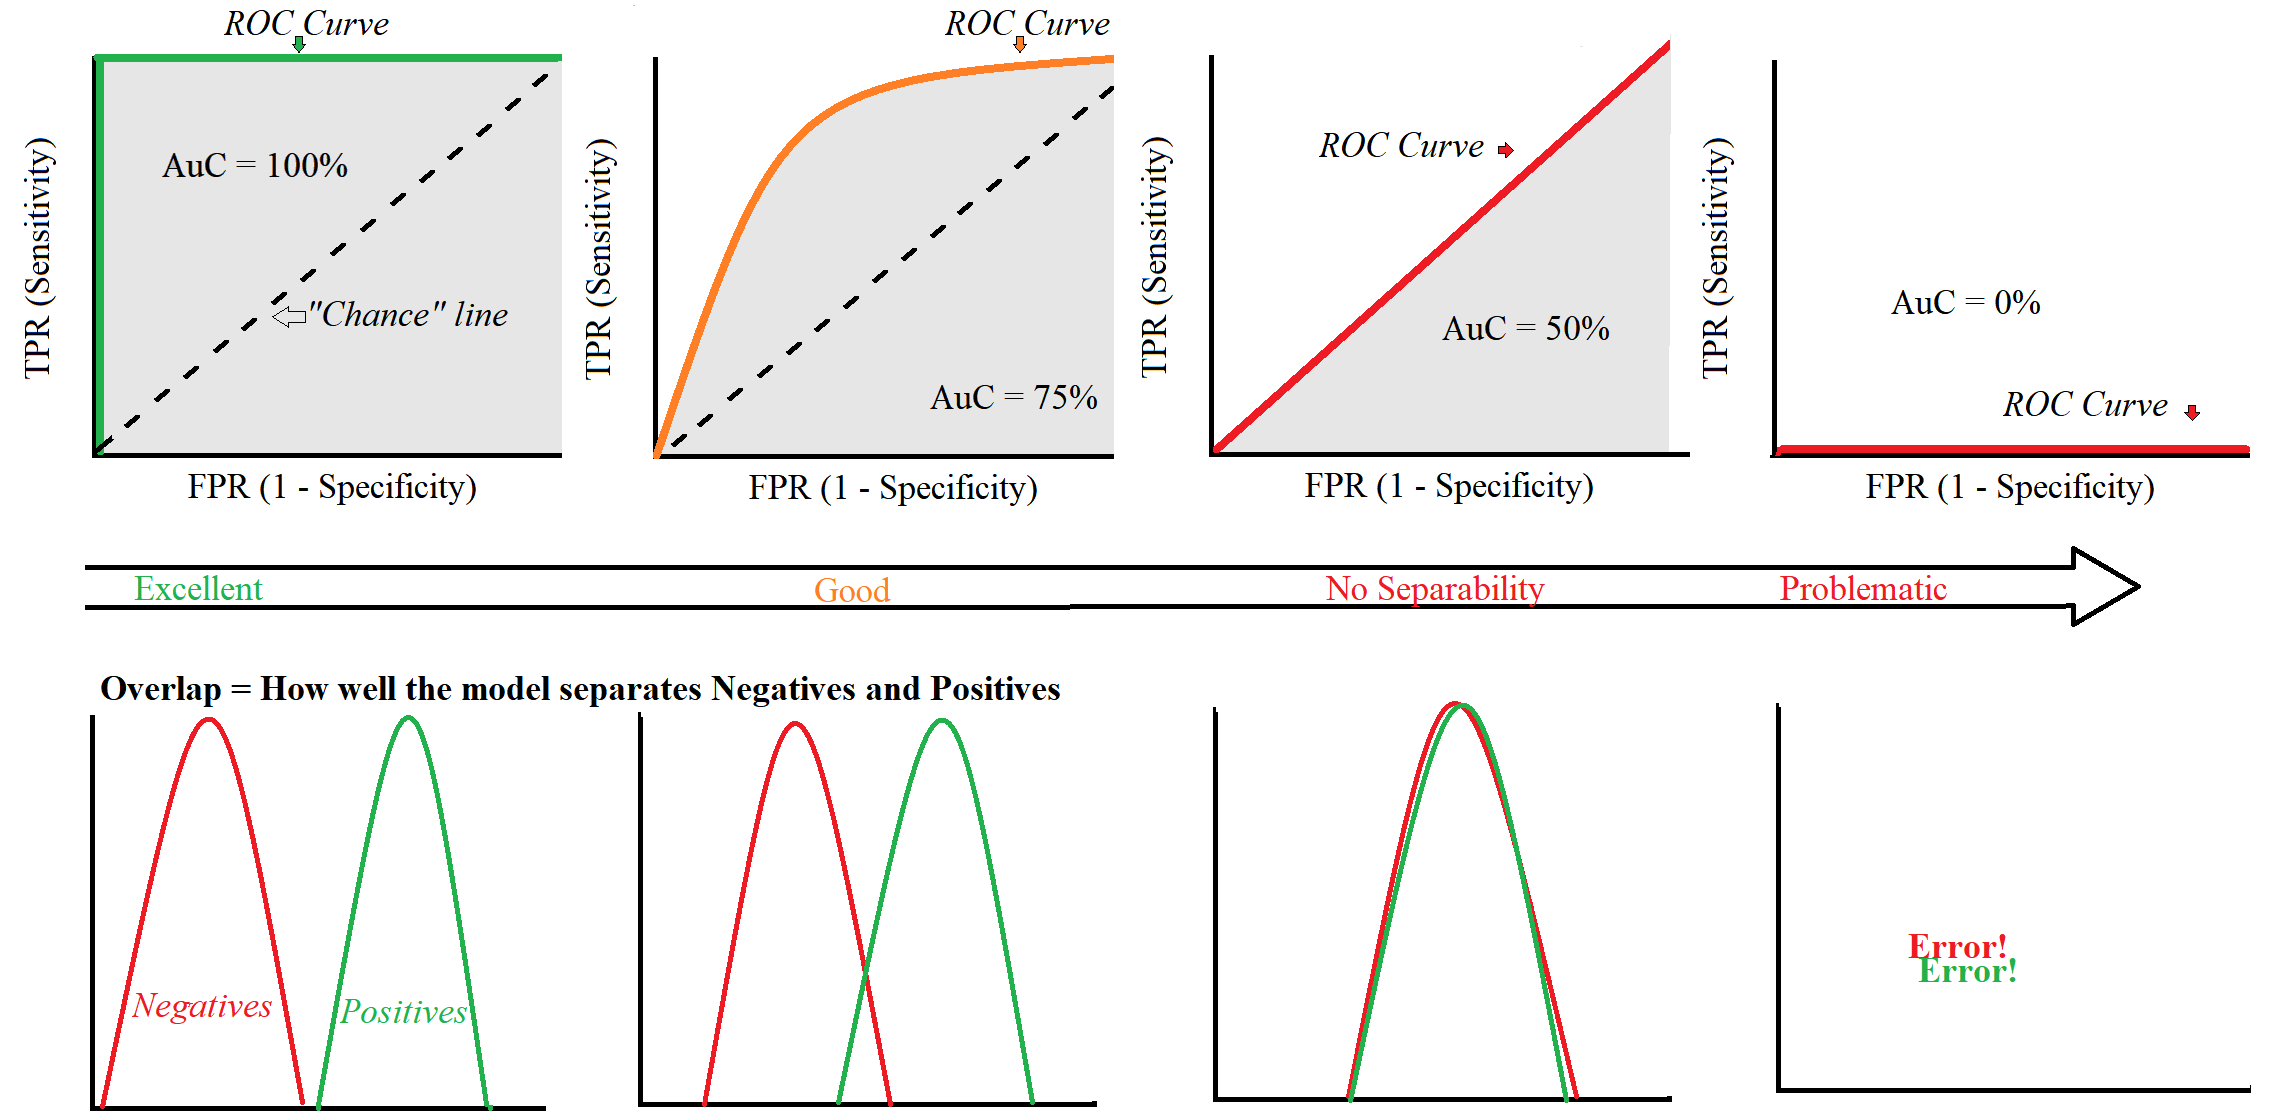

In [52]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

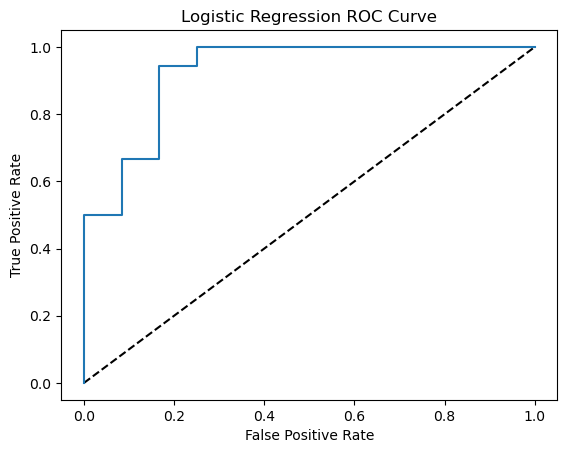

In [53]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [54]:
lr = LogisticRegression()
lr

LogisticRegression()

In [55]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [56]:
lr_searcher = GridSearchCV(lr, parameters)

In [57]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [58]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [59]:
y_pred = lr_searcher.predict(X_test)

In [60]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


<a id="15"></a>
## Conclusion
* Lets make a practise now!
* You can make different analyzes to reinforce what you have learned.